In [1]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline

## 6.1数据分组

### 6.1.1GroupBy简介

类似于Excel的分类汇总

In [4]:
pd.set_option('mode.chained_assignment',None)

In [3]:
tips=sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [4]:
tips.shape

(244, 7)

In [18]:
grouped = tips['tip'].groupby(tips['sex'])  #此处的分组键tips['sex']是Series
grouped  #返回的是GroupBy对象

In [7]:
grouped.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [6]:
#可以通过多个分组键进行计算
date_mean = tips['tip'].groupby([tips['day'],tips['time']]).mean()
date_mean

day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Lunch          NaN
      Dinner    2.993103
Sun   Lunch          NaN
      Dinner    3.255132
Name: tip, dtype: float64

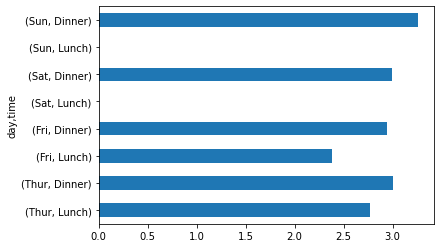

In [9]:
date_mean.plot(kind='barh')

In [9]:
#GroupBy对象是可迭代的，其构造为一组二元元组，由分组名和DataFrame构成。
for name,group in tips.groupby(tips['sex']):
    print(name)
    print(group)  #group是个DataFrame

Male
     total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns]
Female
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Female  

In [21]:
tips.groupby(tips['sex']).size()  #各分组的大小

sex
Male      157
Female     87
dtype: int64

In [16]:
tips.groupby(tips['sex']).count()

total_bill  tip  smoker  day  time  size
sex                                             
Male           157  157     157  157   157   157
Female          87   87      87   87    87    87

### 6.1.2按列名分组

In [10]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [19]:
#列索引名称作为分组键，用于分组的对象必须是DataFrame数据本身，不能是某个字段：出错！tips['total_bill'].groupby('smoker').mean() 
#分组键可以是数量数据，但是不要随便用
smoker_mean = tips.groupby('smoker').mean()  #对数量数据求平均。size和count也可以用
smoker_mean  #返回多列的DataFrame类型

total_bill       tip      size
smoker                                
Yes      20.756344  3.008710  2.408602
No       19.188278  2.991854  2.668874

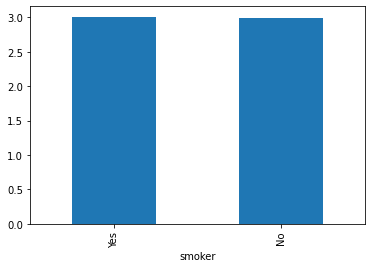

In [22]:
smoker_mean['tip'].plot(kind='bar')

比较两个代码，语法糖（等价代码，但是更简洁、更自然）

In [42]:
size_mean1 = tips['tip'].groupby(tips['size']).mean()
size_mean1

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [41]:
size_mean2 = tips.groupby('size')['tip'].mean()  #语法糖
size_mean2

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

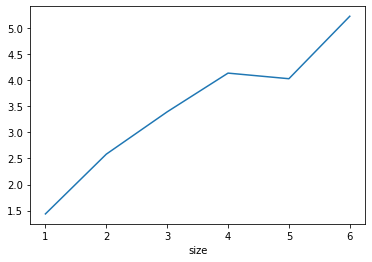

In [43]:
size_mean2.plot()

### 6.1.3按列表分组

元组无法用来分组

In [9]:
df = DataFrame(np.arange(20).reshape(4,5))
df

0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19

In [12]:
list1 = ['a','b','a','b']

In [13]:
df.groupby(list1).sum()

0   1   2   3   4
a  10  12  14  16  18
b  20  22  24  26  28

### 6.1.4按字典分组

用字典定义分组规则

In [34]:
df = DataFrame(np.random.normal(size=(6,6)),index=['a','b','c','A','B','C'])
df

0         1         2         3         4         5
a  0.846087 -1.456851  0.939387  1.188069  0.078918  0.751108
b -0.198919 -0.753343 -0.682097  0.820402  0.066199 -0.131590
c  0.337192  0.446319 -0.347319 -0.033504 -0.143534 -1.592058
A -0.060206  0.140003  0.770038  1.129965 -0.067598  0.268674
B -1.173996 -0.098912 -0.430821 -0.632599  0.355821 -0.540854
C  2.530897 -0.044365  3.097708 -0.869767  0.052907  0.660493

In [35]:
dict1 = {
    'a':'one',
    'A':'one',
    'b':'two',
    'B':'two',
    'c':'three',
    'C':'three'
}

In [36]:
df.groupby(dict1).sum()

0         1         2         3         4         5
one    0.785881 -1.316848  1.709425  2.318034  0.011321  1.019782
three  2.868089  0.401954  2.750389 -0.903271 -0.090627 -0.931565
two   -1.372915 -0.852255 -1.112917  0.187803  0.422019 -0.672444

### 6.1.5按函数分组

In [37]:
df = DataFrame(np.random.randn(4,4))
df

0         1         2         3
0  0.060834 -0.266792  0.903244  0.775752
1 -0.011772 -0.406844  1.027212 -0.256141
2  1.349189 -1.052994  2.406409  0.469341
3  1.265587  0.942524 -1.299785 -0.249966

In [39]:
def jug(x):
    if x >= 0:
        return 'positive'
    else:
        return 'negtive'

In [40]:
df[3].groupby(df[3].map(jug)).count()

3
negtive     2
positive    2
Name: 3, dtype: int64

行的层次化索引，可通过索引级别进行分组，通过level参数设置编号或名称

In [41]:
df = DataFrame(np.arange(16).reshape(4,4),
              index=[['one','one','two','two'],['a','b','a','b']],
              columns=[['apple','apple','orange','orange'],['red','green','red','green']])
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [48]:
df.groupby(level=1).sum()  #['a','b']为1层

apple       orange      
    red green    red green
a     8    10     12    14
b    16    18     20    22

In [44]:
df.groupby(level=1,axis=1).sum()

green  red
one a      4    2
    b     12   10
two a     20   18
    b     28   26

## 6.2聚合运算

对分组后的数据进行计算

### 6.2.1聚合函数

如前面的mean/size/count。空值不参与运算

In [53]:
max_tip = tips.groupby('sex')['tip'].max()
max_tip

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

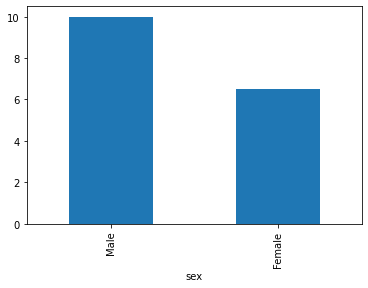

In [54]:
max_tip.plot(kind='bar')

In [61]:
df = DataFrame(np.arange(16).reshape(4,4))
df

0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15

In [64]:
#Series和DataFrame支持的能用于分组的函数都可以使用
list1 = ['a','b','a','b']
df.groupby(list1).quantile(0.25)  #quantile：分位数。0.25是第一四分位数

0    1    2    3
a  2.0  3.0  4.0  5.0
b  6.0  7.0  8.0  9.0

可以自定义聚合函数，通过agg或aggregate，产生标量值。

分组之后返回多个子数据帧，如果要计算每个子数据帧的某些列的某些信息，如方差，极差，最值等，就可以用这个聚合操作。<br/>
aggregate(函数 / lambda表达式 / 函数列表 / 字典) -> return 一个数（即标量，而不是向量），然后各个子数据帧都变成一行，再合并。

In [15]:
def get_range(x):  #算极差
    return x.max()-x.min()

In [16]:
tips_range = tips.groupby('sex')['tip'].agg(get_range)
tips_range

sex
Male      9.0
Female    5.5
Name: tip, dtype: float64

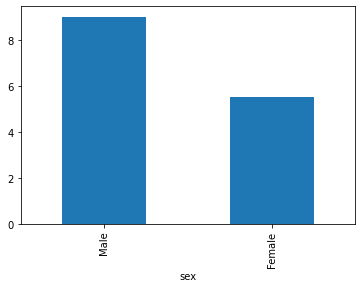

In [68]:
tips_range.plot(kind='bar')

### 6.2.2多函数应用

#### 1.一列多函数：agg函数传入多个函数列表

In [51]:
tips.groupby(['sex','smoker'])['tip'].agg(['mean','std',get_range])  #注意mean和std用引号，以区别于自定义函数。默认以函数名作为结果的列名

mean       std  get_range
sex    smoker                               
Male   Yes     3.051167  1.500120       9.00
       No      3.113402  1.489559       7.75
Female Yes     2.931515  1.219916       5.50
       No      2.773519  1.128425       4.20

In [75]:
#agg的参数是二元组构成的列表，每个二元组的前者是列名，后者是对应聚合函数名
tips.groupby(['sex','smoker'])['tip'].agg([('tip_mean','mean'),('Range',get_range)])

tip_mean  Range
sex    smoker                 
Male   Yes     3.051167   9.00
       No      3.113402   7.75
Female Yes     2.931515   5.50
       No      2.773519   4.20

#### 2.多列多函数

In [53]:
#会产生层次化索引
#tips.groupby(['day','time'])['total_bill','tip'].agg([('tip_mean','mean'),('Range',get_range)])
#用列表索引
tips.groupby(['day','time'])[['total_bill','tip']].agg([('tip_mean','mean'),('Range',get_range)])

total_bill              tip      
              tip_mean  Range  tip_mean Range
day  time                                    
Thur Lunch   17.664754  35.60  2.767705  5.45
     Dinner  18.780000   0.00  3.000000  0.00
Fri  Lunch   12.845714   7.69  2.382857  1.90
     Dinner  19.663333  34.42  2.940000  3.73
Sat  Lunch         NaN    NaN       NaN   NaN
     Dinner  20.441379  47.74  2.993103  9.00
Sun  Lunch         NaN    NaN       NaN   NaN
     Dinner  21.410000  40.92  3.255132  5.49

#### 3.不同列不同函数

In [49]:
#用字典定义映射关系
#tips.groupby(['day','time'])['total_bill','tip'].agg({'total_bill':'sum','tip':'mean'})
tips.groupby(['day','time'])[['total_bill','tip']].agg({'total_bill':'sum','tip':'mean'})

total_bill       tip
day  time                        
Thur Lunch      1077.55  2.767705
     Dinner       18.78  3.000000
Fri  Lunch        89.92  2.382857
     Dinner      235.96  2.940000
Sat  Lunch          NaN       NaN
     Dinner     1778.40  2.993103
Sun  Lunch          NaN       NaN
     Dinner     1627.16  3.255132

In [51]:
#不同列多个函数
tips.groupby(['day','time'])[['total_bill','tip']].agg({'total_bill':['sum','mean'],'tip':'mean'})

total_bill                  tip
                   sum       mean      mean
day  time                                  
Thur Lunch     1077.55  17.664754  2.767705
     Dinner      18.78  18.780000  3.000000
Fri  Lunch       89.92  12.845714  2.382857
     Dinner     235.96  19.663333  2.940000
Sat  Lunch         NaN        NaN       NaN
     Dinner    1778.40  20.441379  2.993103
Sun  Lunch         NaN        NaN       NaN
     Dinner    1627.16  21.410000  3.255132

In [95]:
#as_index=False，返回结果不以分组键为索引，分组键作为列
no_index = tips.groupby(['sex','smoker'],as_index=False)['tip'].mean()
no_index

sex smoker       tip
0    Male    Yes  3.051167
1    Male     No  3.113402
2  Female    Yes  2.931515
3  Female     No  2.773519

## 6.3更多分组运算

### 6.3.1 transform方法：使运算分布到每一行

transform(函数 / lambda表达式) -> 返回一个列向量，该列向量和原子数据帧等长，然后各个子数据帧还是和原来一样的行数，再合并，合并之后的新数据帧和原始数据帧等行数。<br/>
如果每个子数据帧的每一列都返回一个标量，那么这个标量会广播，广播成一个列向量，填充成和原子数据帧一样行数的列向量。

In [27]:
#区分性别之后计算z值(偏离均值几个标准差)
tips.groupby('sex')['tip'].transform(lambda x : (x-np.mean(x)/np.std(x)))

0     -1.447859
1     -0.421459
2      1.418541
3      1.228541
4      1.152141
         ...   
239    3.838541
240   -0.457859
241   -0.081459
242   -0.331459
243    0.542141
Name: tip, Length: 244, dtype: float64

In [19]:
#比较agg()和transform()的区别

In [20]:
tips.groupby('sex')['tip'].agg('mean')

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [21]:
tips.groupby('sex')['tip'].transform('mean')

0      2.833448
1      3.089618
2      3.089618
3      3.089618
4      2.833448
         ...   
239    3.089618
240    2.833448
241    3.089618
242    3.089618
243    2.833448
Name: tip, Length: 244, dtype: float64

如何实现增加一列用于存放男性和女性小费的平均值？

In [4]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [28]:
#常规思路：
df = DataFrame(tips.groupby('sex')['tip'].mean())
df

tip
sex             
Male    3.089618
Female  2.833448

In [29]:
new_tips = pd.merge(tips,df,left_on='sex',right_index=True)
new_tips.head()

total_bill  tip_x     sex smoker  day    time  size     tip_y
0        16.99   1.01  Female     No  Sun  Dinner     2  2.833448
4        24.59   3.61  Female     No  Sun  Dinner     4  2.833448
11       35.26   5.00  Female     No  Sun  Dinner     4  2.833448
14       14.83   3.02  Female     No  Sun  Dinner     2  2.833448
16       10.33   1.67  Female     No  Sun  Dinner     3  2.833448

transform方法可以使运算分布到每一行（广播）

In [56]:
tips.groupby('sex')['tip'].transform('mean')

0      2.833448
1      3.089618
2      3.089618
3      3.089618
4      2.833448
         ...   
239    3.089618
240    2.833448
241    3.089618
242    3.089618
243    2.833448
Name: tip, Length: 244, dtype: float64

### 6.3.2 apply方法

apply(函数 / lambda表达式) -> 返回标量或者列向量，然后各个子数据帧合并成新的数据帧。

agg和transform传入的是每个组的每一行，而apply函数传入的是“每个组的所有行（一个整体）”。<br/>
apply返回的结果根据传入函数的返回值决定。

In [ ]:
tips.groupby('sex')['tip'].agg('mean')
tips.groupby('sex')['tip'].transform('mean')
#这个就不可以。tips.groupby('sex')['tip'].apply('mean')

In [2]:
#返回分组后小费金额在前5名
def top(x,n=5):
    return x.sort_values(by='tip',ascending=False)[:n]

In [7]:
tips.groupby('sex').apply(top)

total_bill    tip     sex smoker   day    time  size
sex                                                             
Male   170       50.81  10.00    Male    Yes   Sat  Dinner     3
       212       48.33   9.00    Male     No   Sat  Dinner     4
       23        39.42   7.58    Male     No   Sat  Dinner     4
       59        48.27   6.73    Male     No   Sat  Dinner     4
       141       34.30   6.70    Male     No  Thur   Lunch     6
Female 214       28.17   6.50  Female    Yes   Sat  Dinner     3
       52        34.81   5.20  Female     No   Sun  Dinner     4
       85        34.83   5.17  Female     No  Thur   Lunch     4
       155       29.85   5.14  Female     No   Sun  Dinner     5
       11        35.26   5.00  Female     No   Sun  Dinner     4

In [112]:
#group_keys=False，返回的结果不以分组键为索引
tips.groupby('sex',group_keys=False).apply(top)

total_bill    tip     sex smoker   day    time  size
170       50.81  10.00    Male    Yes   Sat  Dinner     3
212       48.33   9.00    Male     No   Sat  Dinner     4
23        39.42   7.58    Male     No   Sat  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
214       28.17   6.50  Female    Yes   Sat  Dinner     3
52        34.81   5.20  Female     No   Sun  Dinner     4
85        34.83   5.17  Female     No  Thur   Lunch     4
155       29.85   5.14  Female     No   Sun  Dinner     5
11        35.26   5.00  Female     No   Sun  Dinner     4

填充缺失值

In [114]:
data = {
    'name':['张三', '李四', 'peter', '王五', '小明', '小红'],
    'sex':['female', 'female', 'male', 'male','male','female'],
    'math':[67, 72, np.nan, 82, 90, np.nan]
}
df = DataFrame(data)
df['math'] = df['math']
df

name     sex  math
0     张三  female  67.0
1     李四  female  72.0
2  peter    male   NaN
3     王五    male  82.0
4     小明    male  90.0
5     小红  female   NaN

In [115]:
#按均值填充
df.fillna(df['math'].mean())

name     sex   math
0     张三  female  67.00
1     李四  female  72.00
2  peter    male  77.75
3     王五    male  82.00
4     小明    male  90.00
5     小红  female  77.75

In [116]:
#但是，如果男女有别，则分组后再填充缺失值
f = lambda x: x.fillna(x.mean())
df.groupby('sex').apply(f)

name     sex  math
sex                          
female 0     张三  female  67.0
       1     李四  female  72.0
       5     小红  female  69.5
male   2  peter    male  86.0
       3     王五    male  82.0
       4     小明    male  90.0

## 6.4数据透视表：pivot_table

In [117]:
tips.pivot_table?

### 6.4.1透视表

In [64]:
tips.pivot_table(values='tip',index='sex',columns='smoker')  #value是值，index是行，columns是列，默认计算平均值
#如果不指定行或列会怎样？不指定值会怎样？

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519

In [67]:
#aggfunc参数指定计算方式
tips.pivot_table(values='tip',index='sex',columns='smoker',aggfunc='sum')

smoker     Yes      No
sex                   
Male    183.07  302.00
Female   96.74  149.77

In [122]:
#margins=True加入分项小计
tips.pivot_table(values='tip',index='sex',columns='smoker',aggfunc='sum',margins=True)

smoker     Yes      No     All
sex                           
Male    183.07  302.00  485.07
Female   96.74  149.77  246.51
All     279.81  451.77  731.58

### 6.4.2交叉表

计算分组频率，区别于透视表

In [68]:
#计算频数，所以不用指定值
cross_table = pd.crosstab(index=tips['day'],columns=tips['size'])  #注意，crosstab是pandas的方法，用法与pivot_table不同
cross_table

size  1   2   3   4  5  6
day                      
Thur  1  48   4   5  1  3
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1

In [143]:
#div函数可以使得每行或每列的和为1
df = cross_table.div(cross_table.sum(1),axis=0)  #每行和为1
#df = cross_table.div(cross_table.sum(0),axis=1)  #每列和为1
df

size         1         2         3         4         5         6
day                                                             
Thur  0.016129  0.774194  0.064516  0.080645  0.016129  0.048387
Fri   0.052632  0.842105  0.052632  0.052632  0.000000  0.000000
Sat   0.022989  0.609195  0.206897  0.149425  0.011494  0.000000
Sun   0.000000  0.513158  0.197368  0.236842  0.039474  0.013158

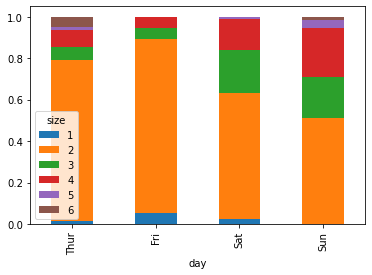

In [145]:
#stacked = True，堆积图
df.plot(kind='bar',stacked = True)